In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
precios = pd.read_csv('prices.csv')
precios.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [2]:
#con este dataset, podr'ia interesarme generar un modelo lineal, para predecir la evoluci'on del precio
#de las acciones al cierre
precios.shape

(851264, 7)

In [3]:
precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [4]:
#como el formato de date es object, mejor pasarlo a formato datetime...

precios['date'] = pd.to_datetime(precios['date'])
precios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   symbol  851264 non-null  object        
 2   open    851264 non-null  float64       
 3   close   851264 non-null  float64       
 4   low     851264 non-null  float64       
 5   high    851264 non-null  float64       
 6   volume  851264 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 45.5+ MB


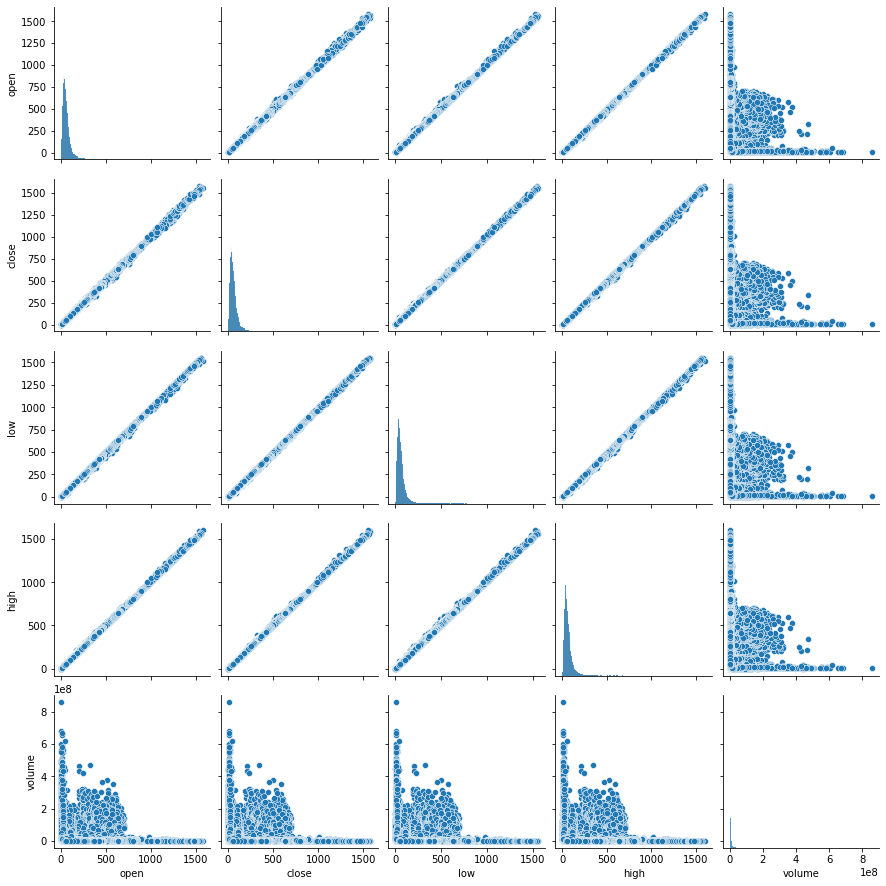

In [5]:
#vamos a ver las relaciones ente variables, de manera gr'afica

sns.pairplot(precios)

In [6]:
#seria muy interesante chequear que acciones, y cuantas veces aparecen

In [7]:
precios['symbol'].value_counts().sort_values().describe()

count     501.000000
mean     1699.129741
std       253.731238
min       126.000000
25%      1762.000000
50%      1762.000000
75%      1762.000000
max      1762.000000
Name: symbol, dtype: float64

In [8]:
#de aca se ve que la gran mayoria de las acciones (mas del 75%) contiene 1762 entradas

<AxesSubplot:>

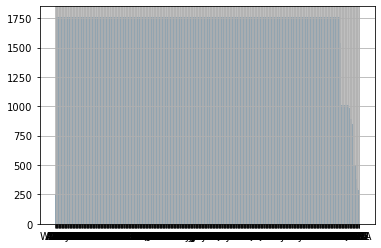

In [9]:
precios['symbol'].hist(bins = 501)

In [10]:
#de una mirada grafica sobre el pairplot, se ve que las variables de los precios estan correlacionadas
#no siendo tan clara la relacion con el volumen de ventas
#voy a utilizar como variables explicativas la media de max, y min del precio , y al volumen, 
#y al tiempo, como variable independiente. Para predecir el precio al cierre

In [11]:
precios.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [12]:
lista_medias=[]
for i in range(0,precios.shape[0]):
    lista_medias.append((precios.loc[i,'low']+precios.loc[i,'high'])/2)
len(lista_medias)

851264

In [13]:
precios['media']=lista_medias

In [14]:
df = precios.loc[:,['date', 'media' , 'volume' , 'close']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   media   851264 non-null  float64       
 2   volume  851264 non-null  float64       
 3   close   851264 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 26.0 MB


In [15]:
precios.corr()

,open,close,low,high,volume,media
open,1.000000,0.999849,0.999916,0.999930,-0.059950,0.999950
close,0.999849,1.000000,0.999928,0.999927,-0.060154,0.999955
low,0.999916,0.999928,1.000000,0.999892,-0.060760,0.999973
high,0.999930,0.999927,0.999892,1.000000,-0.059452,0.999974
volume,-0.059950,-0.060154,-0.060760,-0.059452,1.000000,-0.060102
media,0.999950,0.999955,0.999973,0.999974,-0.060102,1.000000


In [16]:
df.corr()

,media,volume,close
media,1.000000,-0.060102,0.999955
volume,-0.060102,1.000000,-0.060154
close,0.999955,-0.060154,1.000000


In [17]:
#claramente el volumen, no correlaciona fuertemente con las variables ,media, ni precio de cierre,
#sin embargo resulta interesante agregarla en nuestro analisis

In [18]:
#para analizar series temporales, hay que usar la columna date, como index del df...
df.columns

Index(['date', 'media', 'volume', 'close'], dtype='object')

In [19]:
df = df.set_index('date')

In [20]:
#ahora vamos a armar los trainging, y testing sets

In [21]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(df , test_size = 0.2 , random_state = 42)
print('dim train_set: ',train_set.shape , 'dim test_set: ',test_set.shape)

dim train_set:  (681011, 3) dim test_set:  (170253, 3)


In [22]:
X_train = train_set.loc[: , ['media' , 'volume']]

X_test = test_set.loc[: , ['media' , 'volume']]

y_train = train_set.loc[:,'close']

y_test = test_set.loc[:,'close']

In [23]:
#ahora voy a armar un modelo lineal para ir chequeando que lo que vaya encontrando tenga sentido
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train , y_train)#los X e y de entrenamiento
lin_reg.score(X_train , y_train)

0.999909754588816

In [24]:
#para verificar si esta evaluando bien, verifiquemos su poder predictivo

In [25]:
predichos_lin_reg = lin_reg.predict(X_test)#guarda los predichos para cada X_test
from sklearn.metrics import mean_squared_error
mse_lin_reg = mean_squared_error(y_test , predichos_lin_reg)
mse_lin_reg#con esto tengo el error medio entre predicciones, y valores reales(de los datos)

0.6393593541784076

In [26]:
#la raiz del mse o rmse
rmse_lin_reg = np.sqrt(mse_lin_reg)
rmse_lin_reg

0.7995994961094007

In [27]:
#veamos la regularizacion mediante Ridge

<AxesSubplot:title={'center':'mean squared error vs alpha'}>

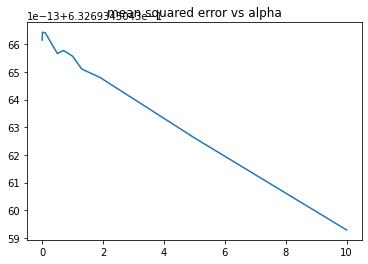

In [28]:
from sklearn import linear_model
ridge = linear_model.RidgeCV(alphas = [0.0001 , 0.001 , 0.01 , 0.1 , 0.5 , 0.7 , 1.0 , 1.3 , 1.9 , 5.0 , 10.0] , store_cv_values=True)
ridge.fit(X_train , y_train)
ridge.score(X_train , y_train)#hasta aca entreno con ridge
mse = pd.DataFrame(ridge.cv_values_)#calculo mse
alphas = ridge.alphas
mse = mse.rename({i: alpha for i, alpha in enumerate(alphas)}, axis=1)
mse.mean(axis=0).plot(title="mean squared error vs alpha")#grafico mse vs alfas

In [29]:
#ahora vamos a ver los predichos por ridge y evaluar que tan bueno es el modelo
predichos_Ridge = ridge.predict(X_test)
mse_predichos_Ridge = mean_squared_error(y_test , predichos_Ridge)
rmse_predichos_Ridge = np.sqrt(mse_predichos_Ridge)
print('mse_Ridge: ' , mse_predichos_Ridge , 'rmse_Ridge: ' , rmse_predichos_Ridge)#graficar  on esto, no con lo de arriba

mse_Ridge:  8211280397.403462 rmse_Ridge:  90616.11555017938


In [30]:
#parece que da un error gigante utilizar Ridge
ridge.best_score_

-0.6326934504359274

In [31]:
ridge.coef_

array([1.00021645, 0.00714573])

In [32]:
ridge.intercept_

-38715.34122334456

In [33]:
ridge.cv_values_

array([[0.00593326, 0.00593326, 0.00593326, ..., 0.00593326, 0.00593325,
        0.00593325],
       [1.87120036, 1.87120036, 1.87120036, ..., 1.87120037, 1.87120038,
        1.8712004 ],
       [0.0201107 , 0.0201107 , 0.0201107 , ..., 0.02011069, 0.02011068,
        0.02011067],
       ...,
       [0.90514838, 0.90514838, 0.90514838, ..., 0.90514836, 0.90514834,
        0.90514829],
       [0.03312433, 0.03312433, 0.03312433, ..., 0.03312433, 0.03312432,
        0.03312431],
       [0.16289016, 0.16289016, 0.16289016, ..., 0.16289016, 0.16289016,
        0.16289016]])

In [34]:
ridge.alpha_

10.0

In [35]:
#vamos con Lasso

In [36]:
lasso = linear_model.LassoCV(alphas = [0.000000001 , 0.0001 , 0.001 , 0.05 , 0.1 , 0.15 , 0.3 , 0.5 , 0.7 , 1.0 , 1.5 , 2 , 3])
lasso.fit(X_train , y_train)
predichos_Lasso = lasso.predict(X_test)#hasta aca genero el modelo con Lasso
mse_predichos_Lasso = mean_squared_error(y_test , predichos_Lasso)#mse
rmse_predichos_Lasso = np.sqrt(mse_predichos_Lasso)#rmse
print('mse_lasso: ' ,mse_predichos_Lasso , 'rmse_lasso: ' ,rmse_predichos_Lasso)

mse_lasso:  0.6393593741433368 rmse_lasso:  0.7995995085937314


In [37]:
lasso.alpha_

1e-09

In [38]:
lasso.coef_

array([ 1.00021703e+00, -4.44900929e-10])

In [39]:
lasso.intercept_

0.013321967190080386

In [40]:
lasso.mse_path_#aca cada posicion es la cv para un dado alfa, dentro tiene 5 cv con el mse medido

array([[0.624136  , 0.67002234, 0.61546071, 0.63839366, 0.62196231],
       [0.62390132, 0.66872937, 0.61492544, 0.63792103, 0.62090013],
       [0.62388663, 0.66819502, 0.61476617, 0.63779034, 0.62048124],
       [0.62394026, 0.66773207, 0.61467821, 0.63772925, 0.62013466],
       [0.6240055 , 0.66748904, 0.61465997, 0.63772633, 0.61996182],
       [0.62406271, 0.66734189, 0.61466227, 0.63773848, 0.61986151],
       [0.6241308 , 0.66720681, 0.6146761 , 0.63776185, 0.61977323],
       [0.62418913, 0.66711311, 0.61469405, 0.63778679, 0.61971471],
       [0.62421006, 0.66708317, 0.61470152, 0.63779658, 0.61969658],
       [0.62423154, 0.66705419, 0.61470967, 0.63780699, 0.61967932],
       [0.62425326, 0.6670265 , 0.61471835, 0.63781788, 0.61966313],
       [0.62425373, 0.6670259 , 0.61471854, 0.63781813, 0.61966278],
       [0.62425378, 0.66702584, 0.61471856, 0.63781815, 0.61966275]])

In [41]:
lasso.alphas_

array([3.0e+00, 2.0e+00, 1.5e+00, 1.0e+00, 7.0e-01, 5.0e-01, 3.0e-01,
       1.5e-01, 1.0e-01, 5.0e-02, 1.0e-03, 1.0e-04, 1.0e-09])

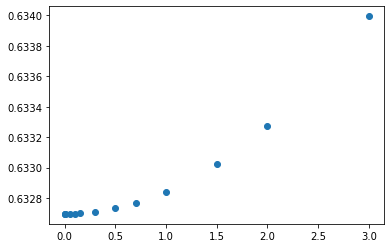

In [42]:
import matplotlib.pyplot as plt
#grafiquemos el error
alfas_lasso = list(lasso.alphas_)#la lista de alfas
alfas_lasso_rev = []#como viene decrecente, la invierto
for i in reversed(alfas_lasso):
    alfas_lasso_rev.append(i)
mse_lasso = list(lasso.mse_path_)#lista de mse de lasso, decreciente
mse_lasso_rev = []#invierto el orden
for j in reversed(mse_lasso):
    mse_lasso_rev.append(j)
media_mse_lasso = []#genero una lista con las medias de los mse para cada alfa
for k in range(0 , len(mse_lasso_rev)):
    media_mse_lasso.append(np.mean(mse_lasso_rev[k]))
rmse_lasso = []#calculo em rmse para cada alfa
for l in range(0 , len(media_mse_lasso)):
    rmse_lasso.append(np.sqrt(media_mse_lasso[l]))
fig1 = plt.scatter(alfas_lasso_rev , media_mse_lasso)#figura del mse medio vs alfa para lasso

plt.show()

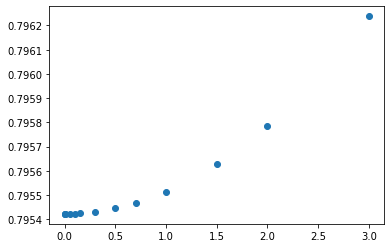

In [43]:
fig2 = plt.scatter(alfas_lasso_rev , rmse_lasso)#figura del rmse medio vs alfa para lasso

plt.show()

In [44]:
#ahora queda elasticnet

In [45]:
from sklearn.metrics import mean_squared_error
import sklearn.linear_model

elastic_net = sklearn.linear_model.ElasticNetCV(
    alphas = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2 , 1e-1, 1, 1e2], 
    l1_ratio = np.linspace(0,1,11),
    max_iter=100000)
elastic_net.fit(X_train, y_train)

predicted_elastic = elastic_net.predict(X_test)
mean_squared_error(predicted_elastic, y_test)

/home/mariano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/home/mariano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27045476.640056178, tolerance: 384668.7118864645
  model = cd_fast.enet_coordinate_descent_gram(
/home/mariano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/home/mariano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

/home/mariano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/home/mariano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27041864.76643139, tolerance: 383238.76558758965
  model = cd_fast.enet_coordinate_descent_gram(
/home/mariano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/home/mariano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

0.639359374143337

In [46]:
#calculo del mse
mse = []
n_ratios, n_alphas, n_folds = elastic_net.mse_path_.shape
for i in range(n_ratios):
  for j in range(n_alphas):
    for k in range(n_folds):
      ratio = elastic_net.l1_ratio[i]
      alpha = elastic_net.alphas[j]
      mse_iter = elastic_net.mse_path_[i][j][k]
      mse.append([ratio, alpha, k, mse_iter])
mse = pd.DataFrame(mse, columns=["l1_ratio", "alpha", "fold_iter", "mse"])
mse = mse.groupby(["l1_ratio", "alpha"]).agg({"mse": "mean"})
mse = mse.reset_index(drop=False).pivot("l1_ratio", "alpha", "mse")

<AxesSubplot:xlabel='alpha', ylabel='l1_ratio'>

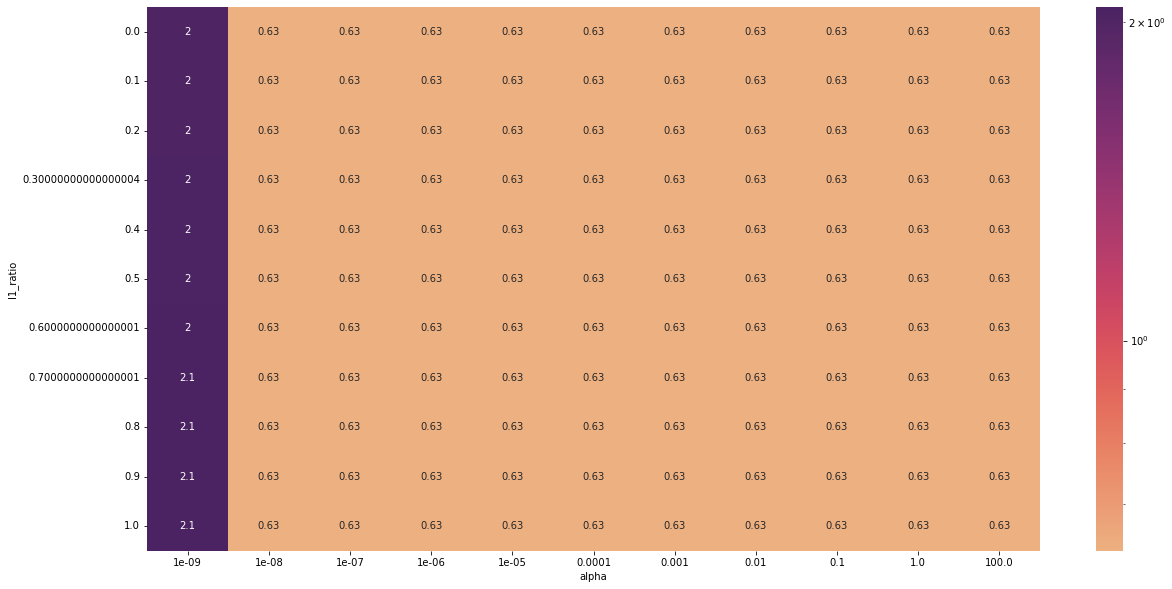

In [47]:
from matplotlib.colors import LogNorm, Normalize
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(mse, ax=ax, annot=True, robust=True, norm=LogNorm(), cmap="flare")